### **1)Utilize o arquivo moviesreviews.tsv (sep = ‘\t’).**

In [2]:
import pandas as pd

In [3]:
file = pd.read_table('moviereviews.tsv',sep='\t')
file.head()

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...


### **2)Faça pré-processamento dos dados.**


In [4]:
import nltk
import re
import matplotlib
import numpy as np

from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer


In [5]:
file['label'] = np.where(file['label'] == 'pos', 1, 0)
file.head()

,label,review
0,0,how do films like mouse hunt get into theatres...
1,0,some talented actresses are blessed with a dem...
2,1,this has been an extraordinary year for austra...
3,1,according to hollywood movies made in last few...
4,0,my first press screening of 1998 and already i...


array([[<AxesSubplot:title={'center':'label'}>]], dtype=object)

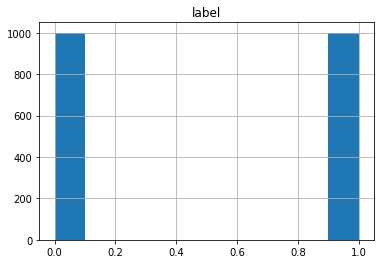

In [6]:
file.hist()

**Remoção dos nulos**

In [7]:
file.isnull().sum()

label      0
review    35
dtype: int64

In [8]:
file.dropna(inplace=True)

In [9]:
file['label'].value_counts()


0    983
1    982
Name: label, dtype: int64

In [10]:
X = file['review'].str.lower().tolist()
y = file['label'].to_numpy()

In [11]:
X[:1]

['how do films like mouse hunt get into theatres ? \r\nisn\'t there a law or something ? \r\nthis diabolical load of claptrap from steven speilberg\'s dreamworks studio is hollywood family fare at its deadly worst . \r\nmouse hunt takes the bare threads of a plot and tries to prop it up with overacting and flat-out stupid slapstick that makes comedies like jingle all the way look decent by comparison . \r\nwriter adam rifkin and director gore verbinski are the names chiefly responsible for this swill . \r\nthe plot , for what its worth , concerns two brothers ( nathan lane and an appalling lee evens ) who inherit a poorly run string factory and a seemingly worthless house from their eccentric father . \r\ndeciding to check out the long-abandoned house , they soon learn that it\'s worth a fortune and set about selling it in auction to the highest bidder . \r\nbut battling them at every turn is a very smart mouse , happy with his run-down little abode and wanting it to stay that way . \r

**Limpeza do texto**

In [12]:
X2 = []
for sent in X:
    new_sent = re.sub('[^A-Za-z0-9\s]+', ' ', sent)
    new_sent = re.sub(r'\s+', ' ', new_sent )
    X2.append(new_sent)

**Tokenização**

In [14]:
text_tokens = [word_tokenize(text) for text in X2 ]


**Remoção das stopwords**

In [15]:
nltk.download('stopwords')
stopwords =  nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/matheus/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
text_tokens = [[token for token in text if token not in stopwords] for text in text_tokens]
text_tokens = text_tokens


**Lemmatização**

In [82]:
len = WordNetLemmatizer()
text_len = [[len.lemmatize(t) for t in text] for text in text_tokens]

In [83]:
text_lower = [" ".join(t) for t in text_len]

In [84]:
text_lower[:1]

['film like mouse hunt get theatre law something diabolical load claptrap steven speilberg dreamworks studio hollywood family fare deadly worst mouse hunt take bare thread plot try prop overacting flat stupid slapstick make comedy like jingle way look decent comparison writer adam rifkin director gore verbinski name chiefly responsible swill plot worth concern two brother nathan lane appalling lee even inherit poorly run string factory seemingly worthless house eccentric father deciding check long abandoned house soon learn worth fortune set selling auction highest bidder battling every turn smart mouse happy run little abode wanting stay way story alternate unfunny scene brother bickering inheritance endless action sequence two take increasingly determined furry foe whatever promise film start soon deteriorates boring dialogue terrible overacting increasingly uninspired slapstick becomes sound fury signifying nothing script becomes unspeakably bad best line poor lee even utter another

### **3) Separe os dados em treino e teste.**

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
X_train, X_test, y_train, y_test = train_test_split(text_lower, y, test_size=0.33, random_state=42, stratify = y)

### **4) Realize a extração de características do texto utilizando BOW e TF-IDF e a classificação dos dados. Utilize diversos classificadores. Uma sugestão é utilizar o Pipeline.**

#### **BOW**

In [87]:
import numpy as np
from sklearn.pipeline import Pipeline

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [88]:
classifiers_list = [
     SVC(),
     LogisticRegression(),
     RandomForestClassifier(),
     DecisionTreeClassifier(),
 ]

In [89]:
for classifier in classifiers_list:
    pipe = Pipeline(steps=[('bow', CountVectorizer()), ('transformer', TfidfTransformer()),("classifier", classifier)])
    pipe.fit(X_train, y_train)
    print(classifier)
    print("model score: %.3f" % pipe.score(X_test, y_test))

SVC()
model score: 0.818
LogisticRegression()
model score: 0.818
RandomForestClassifier()
model score: 0.783
DecisionTreeClassifier()
model score: 0.598


### **5) Otimize o classificador.**

In [90]:
from sklearn.model_selection import GridSearchCV

In [92]:
vectorizer = CountVectorizer()
bow = vectorizer.fit_transform(text_lower)

transform = TfidfTransformer()
tf_idf = transform.fit_transform(bow)

X_train, X_test, y_train, y_test = train_test_split(tf_idf, y, test_size=0.33, random_state=42, stratify = y)

In [93]:
param_decision = {'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random'],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 5, 10]}

In [94]:
grid_search = GridSearchCV(estimator = DecisionTreeClassifier(), param_grid=param_decision)
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [95]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(best_params)
print(best_score)

{'criterion': 'gini', 'min_samples_leaf': 10, 'min_samples_split': 10, 'splitter': 'random'}
0.6489313284940662


SVC

In [96]:
param_svc = {'C': [1, 2, 3, 4, 5],
             'kernel': ['linear', 'poly', 'rbf']} 

In [97]:
grid_search = GridSearchCV(estimator = SVC(), param_grid=param_svc)
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 2, 3, 4, 5],
                         'kernel': ['linear', 'poly', 'rbf']})

In [98]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(best_params)
print(best_score)

{'C': 2, 'kernel': 'linear'}
0.8313083304528173


LogisticRegression

In [99]:
param_LogicR = {'solver': ['lbfgs', 'sag', 'saga'],
             'penalty': ['none', 'l2', 'l1', 'elasticnet'],
             'fit_intercept': [True, False]} 

In [100]:
grid_search = GridSearchCV(estimator = LogisticRegression(), param_grid=param_LogicR)
grid_search.fit(X_train, y_train)

/home/matheus/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/matheus/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/matheus/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/matheus/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/matheus/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/matheus/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:35

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'fit_intercept': [True, False],
                         'penalty': ['none', 'l2', 'l1', 'elasticnet'],
                         'solver': ['lbfgs', 'sag', 'saga']})

In [101]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(best_params)
print(best_score)

{'fit_intercept': True, 'penalty': 'none', 'solver': 'saga'}
0.8328206014517802


RandomForestClassifier

In [102]:
n_estimators = [int(x) for x in np.linspace(start=100, stop=300, num=4)]
max_depth = [int(x) for x in np.linspace(start=5, stop=20, num=4)]
min_samples_split = [2, 3, 5]

param_RF ={
    "n_estimators": n_estimators,
    "max_depth": max_depth,
    "min_samples_split": min_samples_split,
}

In [103]:
grid_search = GridSearchCV(estimator = RandomForestClassifier(), param_grid=param_RF)
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 15, 20],
                         'min_samples_split': [2, 3, 5],
                         'n_estimators': [100, 166, 233, 300]})

In [104]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(best_params)
print(best_score)

{'max_depth': 10, 'min_samples_split': 3, 'n_estimators': 233}
0.8009361677612628


### **6) Teste novos pré-processamentos e verifique se há melhora nos resultados.**

Tirando os números

In [105]:
upgrade = []
for sent in text_lower:
    new_sent = re.sub('[^A-Za-z\s]+', ' ', sent)
    upgrade.append(new_sent)

In [106]:
X_train, X_test, y_train, y_test = train_test_split(upgrade, y, test_size=0.33, random_state=42, stratify = y)

In [107]:
classifiers_list = [
    SVC(C = 2, kernel ='linear'),
    LogisticRegression(fit_intercept = True, penalty= 'none', solver= 'sag'),
    RandomForestClassifier(max_depth =10, min_samples_split= 2, n_estimators = 233),
    DecisionTreeClassifier(criterion='entropy', min_samples_leaf= 5, min_samples_split=5, splitter= 'random'),
]

In [108]:
for classifier in classifiers_list:
    pipe = Pipeline(steps=[('bow', CountVectorizer()), ('transformer', TfidfTransformer()),("classifier", classifier)])
    pipe.fit(X_train, y_train)
    print(classifier)
    print("model score: %.3f" % pipe.score(X_test, y_test))

SVC(C=2, kernel='linear')
model score: 0.838


/home/matheus/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(penalty='none', solver='sag')
model score: 0.831
RandomForestClassifier(max_depth=10, n_estimators=233)
model score: 0.773
DecisionTreeClassifier(criterion='entropy', min_samples_leaf=5,
                       min_samples_split=5, splitter='random')
model score: 0.652


Fazendo o Stemming

In [109]:
from nltk.stem.lancaster import LancasterStemmer
from sklearn import metrics

In [117]:
text_tokens2 = [word_tokenize(text) for text in upgrade ]

stemm = LancasterStemmer()
text_len2 = [[stemm.stem(t) for t in text] for text in text_tokens2]

text_upgrade = [" ".join(t) for t in text_len2]

X_train, X_test, y_train, y_test = train_test_split(text_upgrade, y, test_size=0.33, random_state=42, stratify = y)

In [118]:
for classifier in classifiers_list:
    pipe = Pipeline(steps=[('bow', CountVectorizer()), ('transformer', TfidfTransformer()),("classifier", classifier)])
    pipe.fit(X_train, y_train)
    print(classifier)
    print("model score: %.3f" % pipe.score(X_test, y_test))

SVC(C=2, kernel='linear')
model score: 0.806


/home/matheus/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(penalty='none', solver='sag')
model score: 0.814
RandomForestClassifier(max_depth=10, n_estimators=233)
model score: 0.803
DecisionTreeClassifier(criterion='entropy', min_samples_leaf=5,
                       min_samples_split=5, splitter='random')
model score: 0.629


### **8) Faça análise dos resultados.**


In [122]:
vectorizer = CountVectorizer()
bow = vectorizer.fit_transform(upgrade)

transform = TfidfTransformer()
tf_idf2 = transform.fit_transform(bow)

X_train, X_test, y_train, y_test = train_test_split(tf_idf2, y, test_size=0.33, random_state=42, stratify = y)

In [123]:
clf = SVC(C = 2, kernel ='linear')
clf.fit(X_train, y_train)

SVC(C=2, kernel='linear')

In [126]:
y_pred = clf.predict(X_test)

metrics.confusion_matrix(y_test,y_pred)

array([[272,  53],
       [ 52, 272]])

O melhor classificador utilizado foi o SVC com 83.8%, tirando às pontuações, números, stopwords e lematizando, contudo ao utilizar o stemming ouve uma piora na métrica.
E como pode ser visto na matriz de confusão ficou bem equilibrada, tanto para os erros como os acertos